##### Your name and student ID
- Name: _____
- ID: _____

### 04. Map\Replace\Bins

In [1]:
# map
# Map values of Pandas Series
import pandas as pd
df = pd.DataFrame({'gender':['male','male','female','male','female','female']})
df

,gender
0,male
1,male
2,female
3,male
4,female
5,female


In [2]:
gender_to_boolean = {'female':0,'male':1} #dict
df['gender'].map(gender_to_boolean)


0    1
1    1
2    0
3    1
4    0
5    0
Name: gender, dtype: int64

In [3]:
gender_to_boolean = {'female':0,'male':1} #dict
df['gender_1'] = df['gender'].map(gender_to_boolean)
df

,gender,gender_1
0,male,1
1,male,1
2,female,0
3,male,1
4,female,0
5,female,0


In [4]:
gender_to_boolean = {'female':0,'male':1} #dict #複寫
df['gender'] = df['gender'].map(gender_to_boolean)
df

,gender,gender_1
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0


In [5]:
# replace
# replace values with.....

df = pd.DataFrame({'col1':['c01','c02','c03','c04','c05'],
                   'col2':[65,'NULL','-','-',78],
                   'col3':[321,34,'NULL','-',34]})
df

,col1,col2,col3
0,c01,65,321
1,c02,NULL,34
2,c03,-,NULL
3,c04,-,-
4,c05,78,34


In [6]:
df.replace('-',0)

,col1,col2,col3
0,c01,65,321
1,c02,NULL,34
2,c03,0,NULL
3,c04,0,0
4,c05,78,34


In [7]:
df['col2'].replace('-',0)

0      65
1    NULL
2       0
3       0
4      78
Name: col2, dtype: object

In [8]:
df

,col1,col2,col3
0,c01,65,321
1,c02,NULL,34
2,c03,-,NULL
3,c04,-,-
4,c05,78,34


In [9]:
df.replace('NULL',0)

,col1,col2,col3
0,c01,65,321
1,c02,0,34
2,c03,-,0
3,c04,-,-
4,c05,78,34


In [10]:
df.replace(['-','NULL'],0)

,col1,col2,col3
0,c01,65,321
1,c02,0,34
2,c03,0,0
3,c04,0,0
4,c05,78,34


In [11]:
df.replace({'NaN':0,'NULL':-1})  #dictionary

,col1,col2,col3
0,c01,65,321
1,c02,-1,34
2,c03,-,-1
3,c04,-,-
4,c05,78,34


In [12]:
# bins
# bin values into discrete intervals.

In [13]:
df = pd.DataFrame({'id':['John','Mary','Tom','Nick','Alice'],
                   'score':[90,59,68,77,60]})
df

,id,score
0,John,90
1,Mary,59
2,Tom,68
3,Nick,77
4,Alice,60


In [14]:
bins =[0,60,70,80,90,100]
pd.cut(df['score'],bins)

0    (80, 90]
1     (0, 60]
2    (60, 70]
3    (70, 80]
4     (0, 60]
Name: score, dtype: category
Categories (5, interval[int64]): [(0, 60] < (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [15]:
pd.cut(df['score'],bins, right=False)

0    [90, 100)
1      [0, 60)
2     [60, 70)
3     [70, 80)
4     [60, 70)
Name: score, dtype: category
Categories (5, interval[int64]): [[0, 60) < [60, 70) < [70, 80) < [80, 90) < [90, 100)]

In [16]:
bins = [0,60,70,80,90,100]
labels = ["X","D","C","B","A"]
pd.cut(df['score'],bins, right=False, labels=labels)

0    A
1    X
2    D
3    C
4    D
Name: score, dtype: category
Categories (5, object): ['X' < 'D' < 'C' < 'B' < 'A']

In [17]:
df['label'] = pd.cut(df['score'],bins, right=False, labels=labels)
df

,id,score,label
0,John,90,A
1,Mary,59,X
2,Tom,68,D
3,Nick,77,C
4,Alice,60,D


### 05. where where where

##### NumPy Searching Arrays
- You can search an array for a certain value, and return the indexes that get a match.
- To search an array, use the where() method.

In [18]:
#np.where return the index of where the ture is...
import numpy as np
arr = np.array([1, 2, 3, 4, 5, 4, 4])
x = np.where(arr == 4) #回傳 index位置 數字
print(x)

(array([3, 5, 6]),)


In [19]:
# find the index of all odd number: ex: 1,3,5,7,....
import numpy as np
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x=np.where(arr%2==1) #回傳 index位置 數字
print(x)

(array([0, 2, 4, 6]),)


##### pandas.DataFrame.where
- The where method is an application of the if-then idiom. 
- For each element in the calling DataFrame, if cond is True the element is used; otherwise the corresponding element from the DataFrame other is used.

In [20]:
# series or  DataFrame name.where
import pandas as pd
s = pd.Series(range(5))
s.where(s > 1) # where in pd =>keep the valuse who meet the condition
            #the others =>NaN


0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

In [21]:
# series or  DataFrame name.where
import pandas as pd
s = pd.Series(range(5))
s.where(s > 1,888) # NaN 取代成888

0    888
1    888
2      2
3      3
4      4
dtype: int64

In [22]:
s.mask(s > 1)
# where in pd =>mask the valuse who meet the condition
#turn this value =>NaN

0    0.0
1    1.0
2    NaN
3    NaN
4    NaN
dtype: float64

In [23]:
s.mask(s > 1,888) #Nan 取代為888

0      0
1      1
2    888
3    888
4    888
dtype: int64

In [24]:
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [25]:
m = df % 3 == 0
df.where(m)

,A,B
0,0.0,NaN
1,NaN,3.0
2,NaN,NaN
3,6.0,NaN
4,NaN,9.0


In [26]:
#find all even values bigger than 3 replace to "*"
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
m = (df % 2 == 0) & (df >3)
df.mask(m,"*")

,A,B
0,0,1
1,2,3
2,*,5
3,*,7
4,*,9


# 【Python for Time Series Data Analysis】
- Time series is a sequence of observations recorded at regular time intervals.
- A time series is any data set where the values are measured at different points in time.
- 趨勢 trend
- 季節性 Seasonality
- 不規則 Irrecular



### 1. What is a Time Series?
- Time series is a sequence of observations recorded at regular time intervals.
 - Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. 
 
- Why even analyze a time series?
 - Because it is the preparatory step before you develop a forecast of the series.
 - Time series forecasting has significance on learning because it is important to a onlin course, number of visitors to a course.

##### Documents : https://docs.python.org/3/library/datetime.html
- Basic date and time types

In [27]:
##### datetime vs timedelta
from datetime import datetime
from datetime import timedelta
now = datetime.now()
now 
#(年,月,日,時,分,秒,微秒) ps: 微秒
# A combination of a date and a time. 
# Attributes: year, month, day, hour, minute, second, microsecond

datetime.datetime(2022, 11, 2, 3, 3, 59, 835902)

In [28]:
type(now)

datetime.datetime

In [29]:
# attributes: year, month, day, hour, minute, second, microsecond
print(now.year)
print(now.month)
print(now.day)

2022
11
2


In [30]:
# methonds (functions)
print (now.weekday()) # Monday ==>0  and Sunday ==>6
print (now.isoformat()) # representing the date in ISO 8601 format

2
2022-11-02T03:03:59.835902


In [31]:
# assign a datetime
BD = datetime(2000,8,8,15,47,0, 0)
BD

datetime.datetime(2000, 8, 8, 15, 47)

In [32]:
# timedelta 
# A timedelta object represents a duration, the difference between two dates or times.
delta = now - BD
delta

datetime.timedelta(days=8120, seconds=40619, microseconds=835902)

In [33]:
# attributes : days,seconds,microseconds
print (delta.days, delta.seconds, delta.microseconds)

8120 40619 835902


In [34]:
datetime(2017, 12, 6, 8, 15) + timedelta(1000,0,0)

datetime.datetime(2020, 9, 1, 8, 15)

In [35]:
datetime(2022, 7, 7, 8, 15) + timedelta(200,0,0)

datetime.datetime(2023, 1, 23, 8, 15)

### parse string to datetime
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior


In [36]:
#使用 datetime.strptime

from datetime import datetime

date = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
date

datetime.datetime(2005, 6, 1, 13, 33)

In [37]:
date = datetime.strptime('2011/02/10 13:33','%Y/%m/%d %H:%M')
date

datetime.datetime(2011, 2, 10, 13, 33)

In [38]:
date = datetime.strptime('05302016 13:33:50','%m%d%Y %H:%M:%S' )
date

datetime.datetime(2016, 5, 30, 13, 33, 50)

In [39]:
date = datetime.strptime('2016-Aug-30 13:33:50', '%Y-%b-%d %H:%M:%S')
date

datetime.datetime(2016, 8, 30, 13, 33, 50)

### convert datetime to string

In [40]:
# datetime => strftime
datetime.strftime(date, '%Y-%B-%d %H:%M:%S')

'2016-August-30 13:33:50'

##### The data set: Open Power Systems Data
- The daily time series of Open Power System Data (OPSD) for Germany
 - https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv
- The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.
- Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh).
 - Date — The date (yyyy-mm-dd format)
 - Consumption — Electricity consumption in GWh
 - Wind — Wind power production in GWh
 - Solar — Solar power production in GWh
 - Wind+Solar — Sum of wind and solar power production in GWh

##### Time series data structures
- The main pandas data structures for working with dates and times. 
- In pandas, a single point in time is represented as a Timestamp.
- We can use the to_datetime() function to create Timestamps from "strings" in a wide variety of date/time formats.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [41]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [42]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [43]:
# dayfirst? #日要在前面
pd.to_datetime('7/8/1952', format = "%d/%m/%Y")

Timestamp('1952-08-07 00:00:00')

If a date does not meet the timestamp limitations, passing errors='ignore' will return the original input instead of raising any exception.
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-timestamp-limits

In [44]:
##### DatetimeIndex object,
# If we supply a list or array of strings as input to to_datetime(), 
# it returns a sequence of date/time values in a DatetimeIndex object.

pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [45]:
# DatetimeIndex object can greatly speed up the performance. 
# Any of the format codes from the strftime() and strptime() functions in Python’s built-in datetime module can be used. 
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

##### Creating a time series DataFrame

In [46]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [47]:
# Let's display the first three and last three rows.

In [48]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [49]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [50]:
# Let’s check out the data types of each column.

In [51]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [52]:
# conver "Date" column as the datetime datatype using to_datetime()
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])

In [53]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [54]:
# set index of opsd_daily by "Date" 
opsd_daily.set_index('Date')

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [55]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [56]:
opsd_daily.index

RangeIndex(start=0, stop=4383, step=1)

##### Shorcut: We can consolidate the above steps into a single line

In [57]:
# using the index_col and parse_dates parameters
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [58]:
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [59]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8
2013-08-08,1291.984,79.666,93.371,173.037,2013,8
2009-08-27,1281.057,NaN,NaN,NaN,2009,8
2015-10-02,1391.050,81.229,160.641,241.870,2015,10
2009-06-02,1201.522,NaN,NaN,NaN,2009,6


<AxesSubplot:xlabel='Date'>

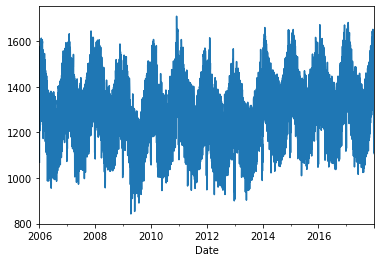

In [60]:
opsd_daily['Consumption'].plot(kind='line')

<AxesSubplot:xlabel='Year'>

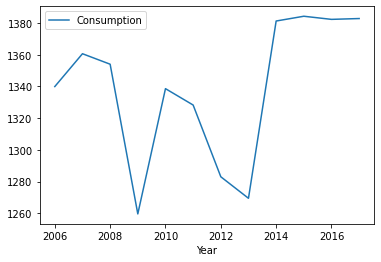

In [61]:
opsd_y=opsd_daily[['Year','Consumption']].groupby('Year').mean()
opsd_y.plot(kind='line')

##### Time-based indexing

In [62]:
# Let's use date/time formatted strings 
# to select data in our DataFrame with the loc accessor.
# For example, '2017-08-10'.
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Name: 2017-08-10 00:00:00, dtype: float64

In [86]:
# For example, '2014-01-20':'2014-01-22'
opsd_daily.loc

In [85]:
# partial-string indexing
# Let's elect the entire year 2006 
opsd_daily.loc['2006']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2006-01-03,1442.533,NaN,NaN,NaN,2006,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1
2006-01-05,1477.131,NaN,NaN,NaN,2006,1
...,...,...,...,...,...,...
2006-12-27,1284.676,NaN,NaN,NaN,2006,12
2006-12-28,1314.603,NaN,NaN,NaN,2006,12
2006-12-29,1274.646,NaN,NaN,NaN,2006,12


In [87]:
# Let's elect the entire month of February 2012
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2
2012-02-03,1563.631,36.352,46.510,82.862,2012,2
2012-02-04,1372.614,20.551,45.225,65.776,2012,2
2012-02-05,1279.432,55.522,54.572,110.094,2012,2
2012-02-06,1574.766,34.896,55.389,90.285,2012,2
2012-02-07,1615.078,100.312,19.867,120.179,2012,2
2012-02-08,1613.774,93.763,36.930,130.693,2012,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2


##### Visualizing time series data

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot:xlabel='Date'>

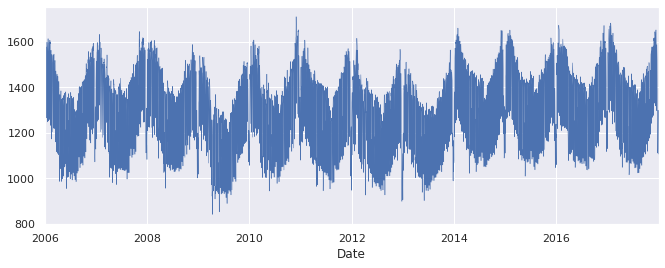

In [67]:
# Let’s create a line plot of the full time series of Germany’s daily electricity consumption
opsd_daily['Consumption'].plot(linewidth=0.5)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

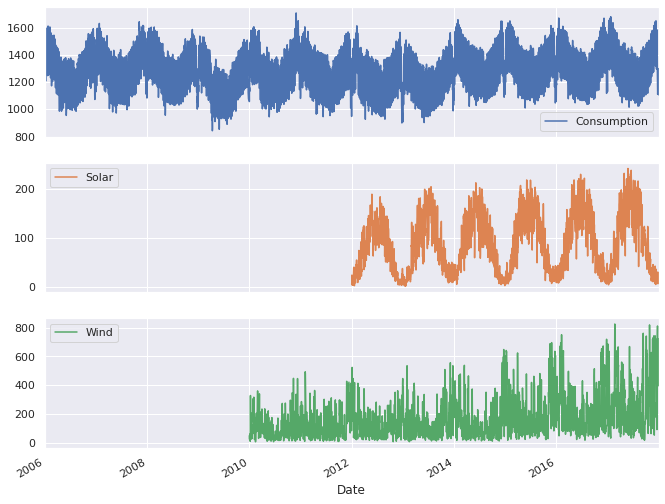

In [88]:
opsd_daily[['Consumption', 'Solar', 'Wind']].plot(figsize=(11, 9), subplots=True)

Text(0, 0.5, 'Daily Consumption (GWh)')

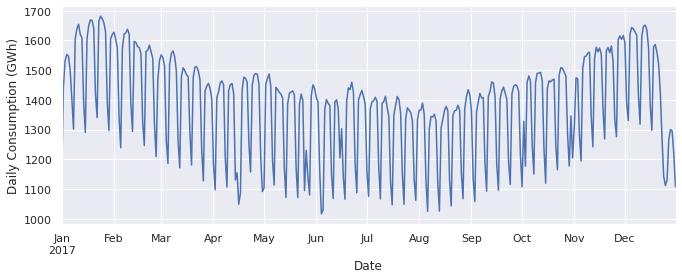

In [89]:
ax = opsd_daily.loc['2017', 'Consumption'].plot() #row , column
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

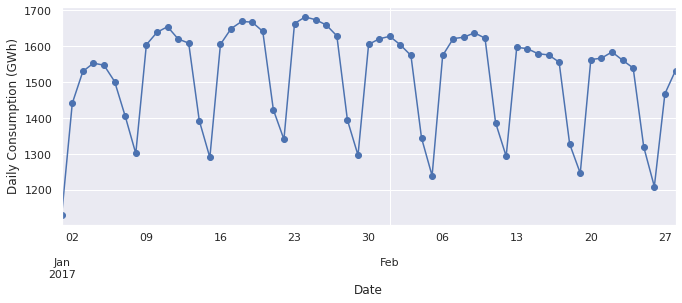

In [70]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o')
ax.set_ylabel('Daily Consumption (GWh)')

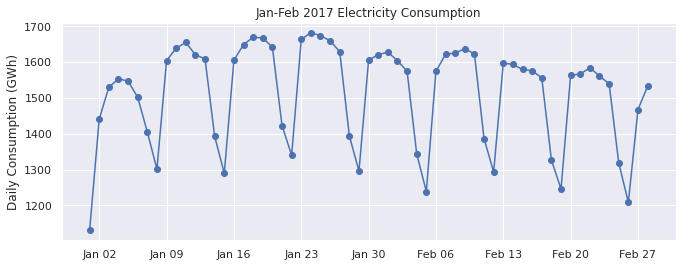

In [93]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

##### Seasonality
- Let’s further explore the seasonality of our data with box plots
- Using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group.

In [94]:
# Consumption
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=opsd_daily, x='Month', y="Consumption")

AttributeError: module 'seaborn' has no attribute '___'

<AxesSubplot:xlabel='Month', ylabel='Wind'>

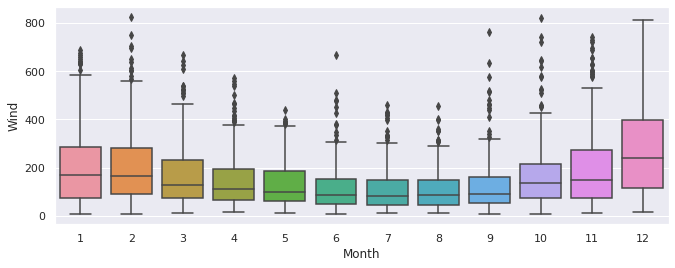

In [73]:
# Wind
sns.boxplot(data=opsd_daily, x='Month', y="Wind")

<AxesSubplot:xlabel='Month', ylabel='Solar'>

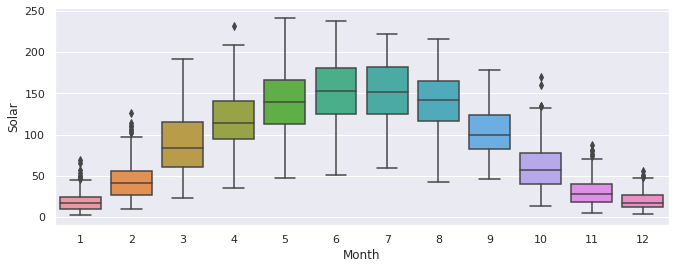

In [74]:
# Solar
sns.boxplot(data=opsd_daily, x='Month', y="Solar")

In [95]:
# to explore weekly seasonality by consumption

sns.boxplot(data=opsd_daily, x='Weekday', y='Consumption')

ValueError: Could not interpret input 'Weekday'

##### Frequencies
- The time series can be associated with a frequency in pandas. 
- For example, let’s use the date_range() function to create a sequence of uniformly spaced dates from 1998-03-10 through 1998-03-15 at daily frequency.

In [96]:
pd.date_range('1998-03-10', '1999-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15', '1998-03-16', '1998-03-17',
               '1998-03-18', '1998-03-19',
               ...
               '1999-03-06', '1999-03-07', '1999-03-08', '1999-03-09',
               '1999-03-10', '1999-03-11', '1999-03-12', '1999-03-13',
               '1999-03-14', '1999-03-15'],
              dtype='datetime64[ns]', length=371, freq='D')

In [97]:
pd.date_range('1998-03-10', '1999-03-15', freq='M')

DatetimeIndex(['1998-03-31', '1998-04-30', '1998-05-31', '1998-06-30',
               '1998-07-31', '1998-08-31', '1998-09-30', '1998-10-31',
               '1998-11-30', '1998-12-31', '1999-01-31', '1999-02-28'],
              dtype='datetime64[ns]', freq='M')

In [98]:
pd.date_range('2004-09-20', periods= 10 , freq='M')

DatetimeIndex(['2004-09-30', '2004-10-31', '2004-11-30', '2004-12-31',
               '2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30'],
              dtype='datetime64[ns]', freq='M')

- DatetimeIndex has an attribute freq 
 - hourly ('H')
 - calendar daily ('D')
 - business daily ('B')
 - weekly ('W')
 - monthly ('M')
 - quarterly ('Q')
 - annual ('A')

##### Resampling
- It is often useful to resample our time series data to a lower frequency. 
- Let's use the DataFrame’s resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. The resample() method returns a Resampler object, similar to a pandas GroupBy object. 
- We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.

In [78]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [79]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


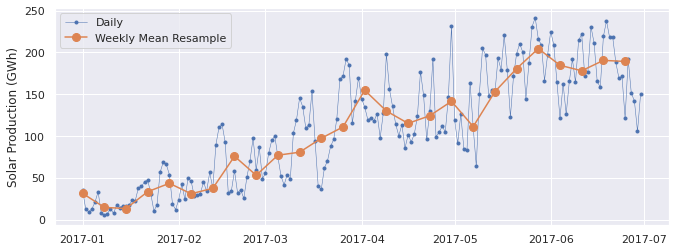

In [99]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

##### Rolling windows
- Similar to resampling, rolling windows split the data into time windows and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. 
- However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.

In [102]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


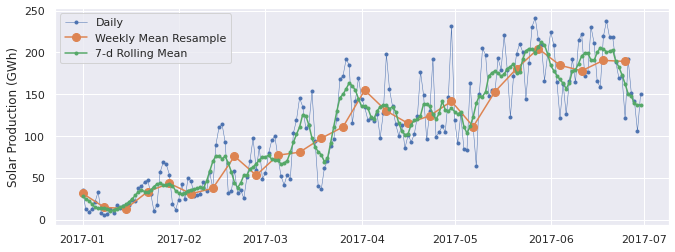

In [104]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

### reference and reading
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
